# Partie 1 : Analyse descriptive des bases et visualisation:

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [19]:
Chemin = input("Donner le chemin absolu de votre dossier contenant les tables et le scrypt python : ")
os.chdir(Chemin)

Donner le chemin absolu de votre dossier contenant les tables et le scrypt python : C:\\Users\marwa\OneDrive\Bureau\Devoir final


In [20]:
#on crée 2 listes qui contiennent mes fichiers, et le nom des différentes plateforme

files=["amazon_prime_titles.csv","disney_plus_titles.csv","netflix_titles.csv"]
plateforme=["Amazon Prime Video", "Disney Plus", "Netflix"]

### Description des données 

La description complète des données est sur le rapport.

In [21]:
for file in files:
    df=pd.read_csv(file)
    print(df.shape) 
    print(df.columns)
df_notes=pd.read_csv("movies_ratings_IMDB.csv", sep=',')    
print(df_notes.shape)
print(df_notes.columns)

(9668, 12)
Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')
(1368, 12)
Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')
(8807, 12)
Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')
(85855, 16)
Index(['title', 'original_title', 'year', 'date_published', 'genre',
       'duration', 'country', 'language', 'director', 'writer',
       'production_company', 'actors', 'description', 'avg_vote',
       'total_votes', 'median_vote'],
      dtype='object')


E:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


### Question 1

Pour cette question, on a d'abord créé une fonction `div_geo()` qui prend en entrée un nom de fichier et qui retourne en sortie le nombre de pays contenu dans ce fichier. Donc cette fonction retourne le nombre de pays contenus sur chaque plateforme.

Grâce à la commande `.split` on peut diviser les données séparées par une `,` contenues dans une même cellule, en plusieurs lignes, indexées de la même manière.

In [22]:
def div_geo(file):
    df=pd.read_csv(file) #ouverture du fichier file dans un dataframe
    df.dropna(subset=['country'], inplace=True) #suppression des données manquantes de la colonne "country" du dataframe "df"
    df['country']=df['country'].astype(str) #définition du format de la colonne "country" en tant que string
    df_country=[] #déclaration de liste

    #on remplit la liste "df_country" 
    for i in list(df['country']):
        df_country += i.split(',') #on sépare les données multiples de la colonne "country"
        df_country_cleaned = [x.strip(' ') for x in df_country] 
        country_set=set(df_country_cleaned) #on crée un ensemble de manière à ce qu'il n'ait pas de doublons
    return(len(country_set)) #la fonction retourne la longueur de l'ensemble

On a ensuite créé une liste `country_count` qui contient le nombre de pays présents dans chacun des fichiers de la listes `files`, autrement dit, le nombre de pays présents sur chaque plateforme.

In [23]:
country_count=[] #déclaration de liste

#on remplit la liste "country_count"
for file in files:  
    country_count.append(div_geo(file))

Enfin, on trace le graphique grâce à la commande `.bar` qui prend en arguments la liste `plateforme`, qui contient les noms des différentes plateformes et la liste `country_count`, qui contient le nombre de pays présents dans chaque plateforme.

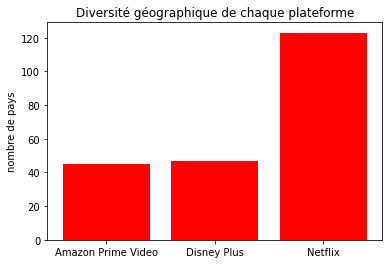

In [7]:
width=0.8 #largeur des barres du diagramme

plt.bar(plateforme, country_count, width, color="red") #tracé sur diagramme en barre
plt.title("Diversité géographique de chaque plateforme") #titre du graphique
plt.ylabel("nombre de pays") #nom de l'axe des ordonnées

plt.show() #affichage du diagramme

### Question 2

On utilise `.loc` pour séléctionner des lignes d'un dataframe sous conditions mentionnées entre crochets : `dataframe.loc[]`

In [8]:
#on a ouvert les fichiers dans 3 dataframes
netflix_df = pd.read_csv("netflix_titles.csv", sep=",")
prime_df = pd.read_csv("amazon_prime_titles.csv", sep=",")
disney_df = pd.read_csv("disney_plus_titles.csv", sep=",")

#on ajoute une colonne "key" poure reconnaître les dataframes après concaténation
netflix_df['key']='Netflix'
prime_df['key']='Prime'
disney_df['key']='Disney'

#on a défini un dictionnaire Entertainment
Entertainment = {"Netflix" : netflix_df, "Prime" : prime_df, "Disney" : disney_df}
df_global = pd.concat(Entertainment) #on a concaténé les 3 dataframes correspondants aux 3 fichiers, soit aux 3 plateformes
df_global["date_added"] = pd.to_datetime(df_global["date_added"]) #on a converti la colonne "date_added" dans un format date

solution=df_global.groupby(['type','date_added','key']).size().reset_index(name='Sorties') #on organise le dataframe par groupes qui nous interessent et on ajoute une colonne "Sorties"

def evolution():
    for clé in Entertainment:
    
        fig, ax = plt.subplots(figsize=(12,10)) #on trace des graphiques différents et on donne leurs tailles
        solution_plot = solution.loc[solution['key'].isin([clé])] #on séléctionne le lignes correspondants à la clé
    
        solution_plot['Cumul_Movie'] = solution_plot.loc[solution_plot['type'].isin(['Movie'])]['Sorties'].cumsum() #on fait la somme cumulée du nombre de "Sorties" pour les films
        solution_plot['Cumul_TV_Show'] = solution_plot.loc[solution_plot['type'].isin(['TV Show'])]['Sorties'].cumsum() #on fait la somme cumulée du nombre de "Sorties" pour les séries
    
        sns.lineplot(data=solution_plot, x="date_added", y="Cumul_TV_Show", ci=None, color="red") #tracé de la courbe des séries
        sns.lineplot(data=solution_plot, x="date_added", y="Cumul_Movie", ci=None, color="blue") #tracé de la courbe des films

    
        plt.legend(['TV Show','Movie']) #dans la légende, la première courbe correspond aux séries et la seconde aux films
        plt.title("Evolution de l'offre - " + clé) #titre du graphique qui change selon la clé
        plt.xlabel("Date d'ajout") #nom axe des abscisses
        plt.ylabel("Nombre total") #nom axe des ordonnées

C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_12880/155218933.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  solution_plot['Cumul_Movie'] = solution_plot.loc[solution_plot['type'].isin(['Movie'])]['Sorties'].cumsum() #on fait la somme cumulée du nombre de "Sorties" pour les films
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_12880/155218933.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  solution_plot['Cumul_TV_Show'] = solution_plot.loc[solution_plot['type'].isin(['TV

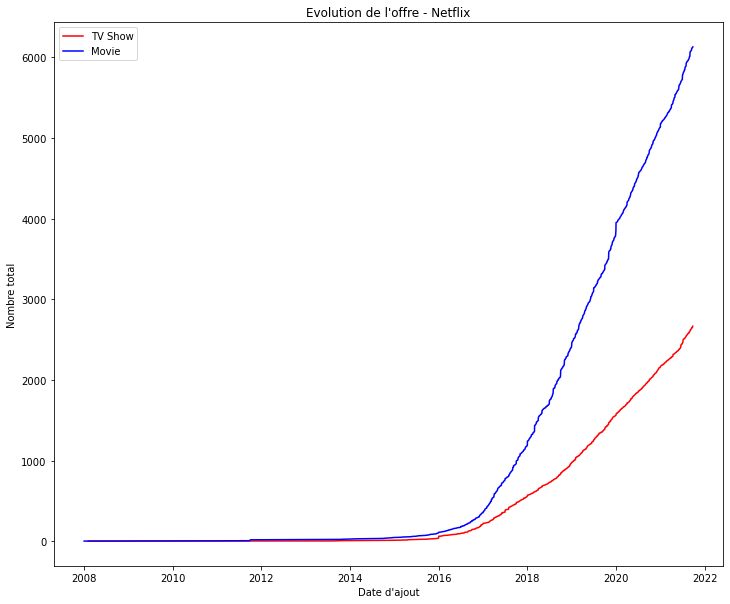

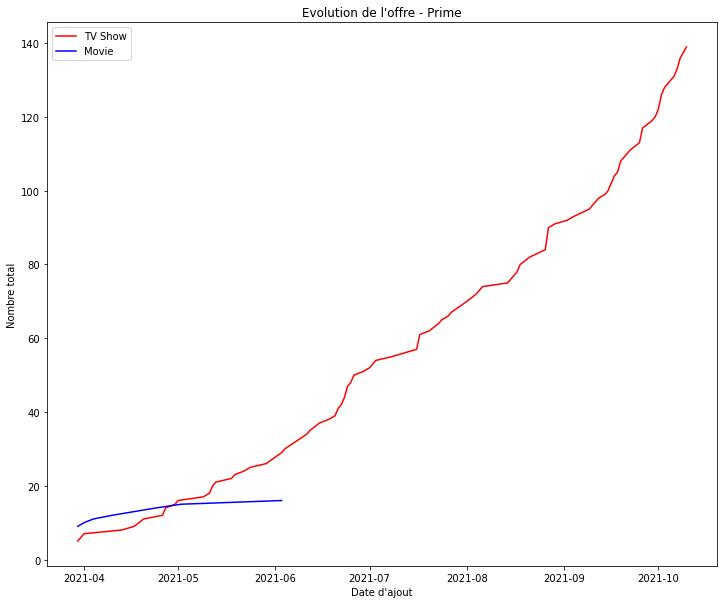

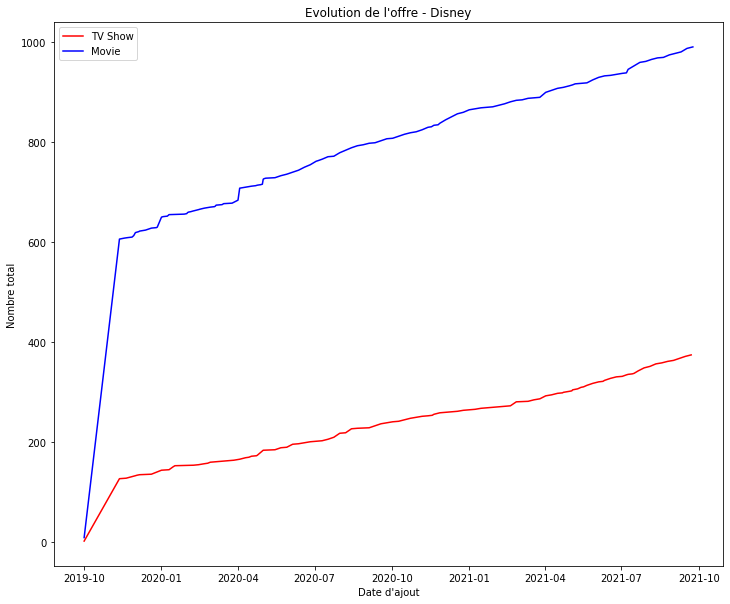

In [9]:
#on appelle la fonction
evolution()

### Question 3 

Pour cette question on a défini 3 fonctions.

La première fonction est `genre_global()` qui donne le top 5 des genres et leurs nombres d'occurrences (sans distinction entre séries et films). Cette fonction prend en entrée un nom de fichier (qui correspond à une plateforme) et retourne en sortie 2 listes : la première `genre_global()[0]` contient les 5 genres les plus représentés sur la plateforme et la seconde `genre_global()[1]` contient le nombre de films et de séries pour chacun de ces genres sur la plateforme.

Grâce aux fonctions `.split` et `.explode` on peut diviser les données séparées par une `,` de la colonne `listed_in`

Grâce à `Counter(liste).most_common(5)` on obtient les 5 genres les plus récurrents et leurs nombres d'occurence. Le résultat obtenu est une liste de tuples de dimension 2. Avec la fonction `zip(*)` on peut récupérer dans une liste `genre_global(file)[0]` les premiers éléments de chaque tuple, et dans une autre liste `genre_global(file)[1]` les seconds éléments de chaque tuple.

In [10]:
#GLOBAL

def genre_global(file):
    tamp=pd.read_csv('%s' %(file)) #ouverture du fichier file dans un dataframe
                                   #ici le %s permet de formater la variable "file" et permet d'ouvrir un nouveau fichier à chaque itération 
    df=tamp.assign(listed_in=tamp['listed_in'].str.split(', ')).explode('listed_in') #df contient tamp avec les données de "listed_in" séparées en plusieurs lignes 
    
    from collections import Counter #on importe le module Counter 
    label, value = zip(*Counter(df.listed_in).most_common(5)) #on applique counter().most_common(5) à la colonne "listed_in" de df
    #label contient les noms des genres
    #value contient le nombre de films/séries par genre
        
    return(list(label),list(value)) #la fonction retourne 2 listes : les genres et le nombres de films/séries associés

On trace le graphique pour chaque plateforme grâce à la commande `.bar` qui prend en arguments, pour chaque fichier de la liste `files`, la liste `genre_global(file)[0]` et la liste `genre_global(file)[1]`.

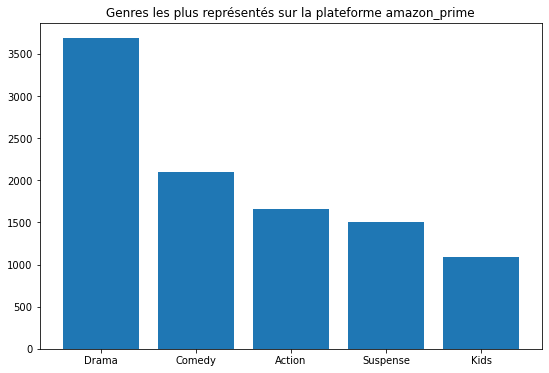

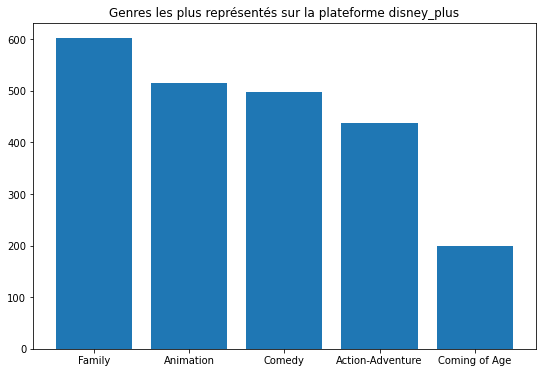

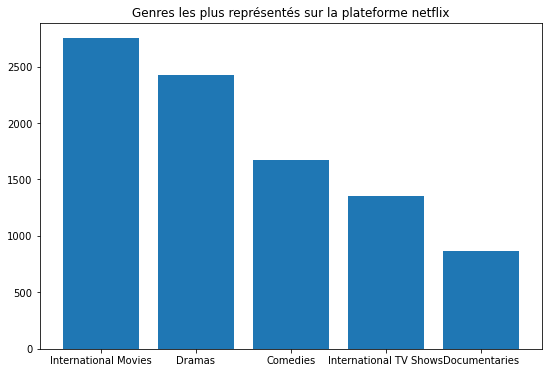

In [11]:
#on trace un graphique pour chaque fichier de files, donc pour chaque plateforme
for file in files:
    fig = plt.figure(figsize=(9, 6)) #taille du graphique
    plt.title('Genres les plus représentés sur la plateforme %s'%(file[:-11])) #titre du graphique 
    #ici le %s permet de formater la variable "file" et permet de modifier le titre à chaque itération avec un nouveau fichier
    #le [:-11] permet de supprimer les 11 derniers caractère de file
    plt.bar(genre_global(file)[0], genre_global(file)[1]) #tracé du diagramme
    plt.show() #affichage du diagramme

La seconde fonction est `genre_tv_show()` qui donne le top 5 des genres des séries et leurs nombres d'occurrences. Cette fonction prend en entrée un nom de fichier (= une plateforme) et retourne en sortie 2 listes : la première `genre_tv_show()[0]` contient les 5 genres de séries les plus représentés sur la plateforme et la seconde `genre_tv_show()[1]` contient le nombre de séries pour chacun de ces genres sur la plateforme.

La structure de la fonction `genre_tv_show()` est la même que la fonction `genre_global()`. Nous avons alors mis les commentaires uniquement pour les lignes qui changent entre ces deux fonctions.

In [12]:
#SERIES

def genre_tv_show(file):
    tamp=pd.read_csv('%s' %(file))
    df=tamp.assign(listed_in=tamp['listed_in'].str.split(', ')).explode('listed_in')
        
    df=df.loc[df['type'].isin(["TV Show"])] #on séléctionne les lignes de "df" pour lesquelles le type est TV Show
                
    from collections import Counter
    labels_tv_show, values_tv_show = zip(*Counter(df.listed_in).most_common(5))
        
    return(list(labels_tv_show),list(values_tv_show))

La structure du tracé des graphiques pour les séries étant la même que pour les graphiques globaux (films/séries), nous n'avons pas mis de commentaires.

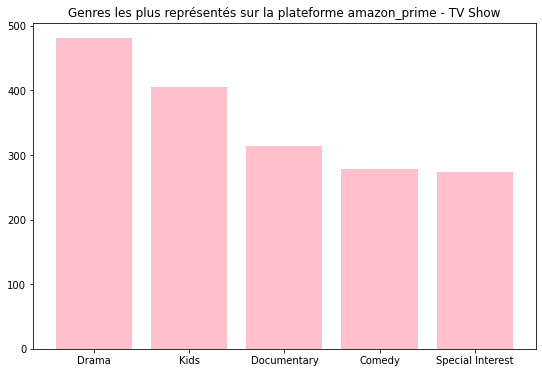

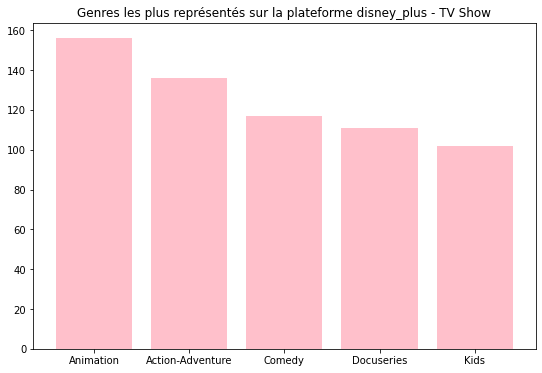

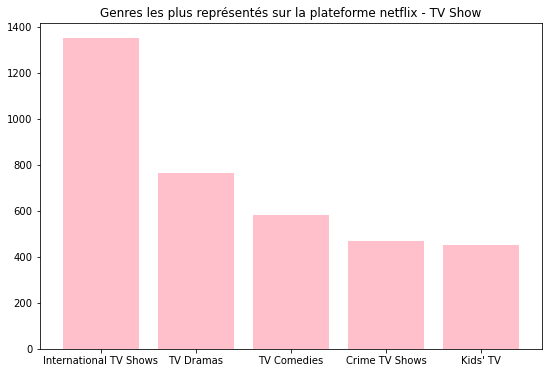

In [13]:
for file in files:
    fig = plt.figure(figsize=(9, 6))
    plt.title('Genres les plus représentés sur la plateforme %s - TV Show'%(file[:-11]))
    plt.bar(genre_tv_show(file)[0], genre_tv_show(file)[1],color='pink')
    plt.show()

La troisième fonction est `genre_movie()` qui donne le top 5 des genres des films et leurs nombres d'occurrence. Cette fonction prend en entrée un nom de fichier (= une plateforme) et retourne en sortie 2 listes : la première `genre_movie()[0]` contient les 5 genres de films les plus représentés sur la plateforme et la seconde `genre_movie()[1]` contient le nombre de films pour chacun de ces genres sur la plateforme.

La structure de la fonction `genre_movie()` est la même que la fonction `genre_global()`. Nous avons alors mis les commentaires uniquement pour les lignes qui changent entre ces deux fonctions.

In [14]:
#FILMS

def genre_movie(file):
    tamp=pd.read_csv('%s' %(file))
    df=tamp.assign(listed_in=tamp['listed_in'].str.split(', ')).explode('listed_in')
        
    df=df.loc[df['type'].isin(["Movie"])] #on séléctionne les lignes de "df" pour lesquelles le type est Movie
                
    from collections import Counter
    labels_movie, values_movie = zip(*Counter(df.listed_in).most_common(5))
     
    return(list(labels_movie),list(values_movie))

La structure du tracé des graphiques pour les films étant la même que pour les graphiques globaux (films/séries), nous n'avons pas mis de commentaires.

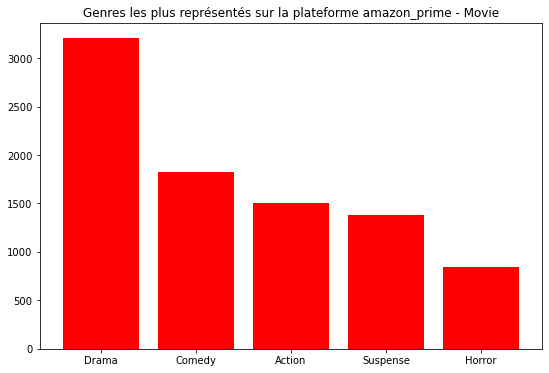

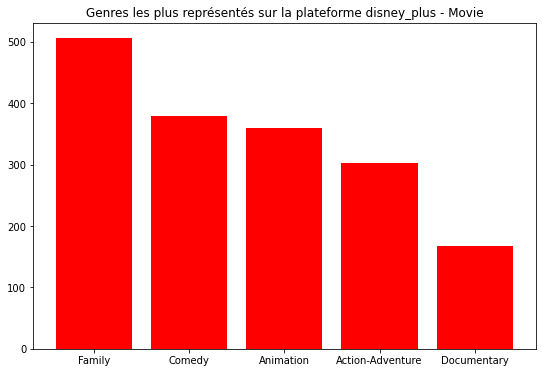

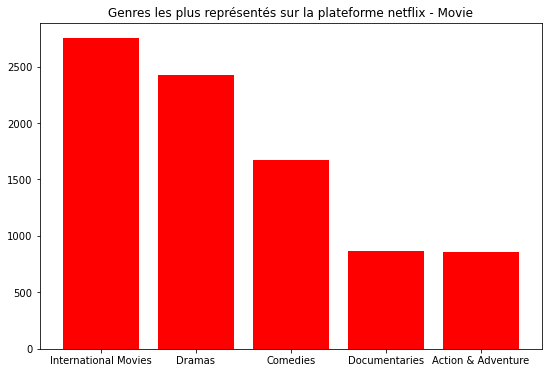

In [15]:
for file in files:
    fig = plt.figure(figsize=(9, 6))
    plt.title('Genres les plus représentés sur la plateforme %s - Movie'%(file[:-11]))
    plt.bar(genre_movie(file)[0], genre_movie(file)[1],color='r')
    plt.show()

### Question 4

Dans cette question, on a défini une fonction `mean()` qui prend en entrée le nom d'un fichier (=une plateforme) et qui retourne en sortie la note moyenne par genre des films de cette plateforme. Cette fonction donne des résultats concernant les 5 genres les plus représentés sur la plateforme.

In [16]:
def mean(file):
    top_genre=genre_movie(file)[0] #liste du top 5 des genres de films
    dff=pd.read_csv(file) #on ouvre le fichier dans un dataframe "dff"
    dff_notes=pd.read_csv("movies_ratings_IMDB.csv", sep=',') #on ouvre le fichier qui contient les notes des films dans un dataframe "dff_notes"
    dff=dff.assign(listed_in=dff['listed_in'].str.split(', ')).explode('listed_in') #on sépare les données multiples de la colonne "listed_in"
    mean=[] #on déclare une liste
    
    for genre in top_genre:
        film=dff.loc[dff['type'].isin(['Movie'])&dff['listed_in'].isin([genre])] #on séléctionne les lignes de "dff" qui sont du type Movie et du genre "genre"
        df_rated=pd.merge(dff_notes, film, how='inner', on='title', sort=True) #on fait l'intersection de "dff_notes" et"film" pour avoir que les lignes des films présents dans les 2 dataframes
    
        df_genre=df_rated.loc[df_rated['listed_in'].isin([genre])] #on séléctionne les films qui appartiennent à "genre"
        df_mean=df_genre['avg_vote'].mean() #on calcule la moyenne des notes des films précédemment séléctionnés
        df_mean_2_decimales=round(df_mean,2) #le resultat "df_mean" sera arrondi à 2 décimales
        mean.append(df_mean_2_decimales) #on remplit la liste préalablement définie par les notes moyennes de chaque genre
    return(mean) #la fonction retourne les notes moyennes

Pour le tracé des graphique de cette question, on a voulu afficher le résultat numérique des notes moyennes sur le graphique (au dessus de chaque barre). On a donc utilisé la fonction `autolabel`.

C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_12880/2933574829.py:4: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  bar_plot = plt.bar(genre_movie(file)[0],mean(file),tick_label=genre_movie(file)[0]) #tracé du diagramme
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_12880/2933574829.py:10: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  mean(file)[idx],


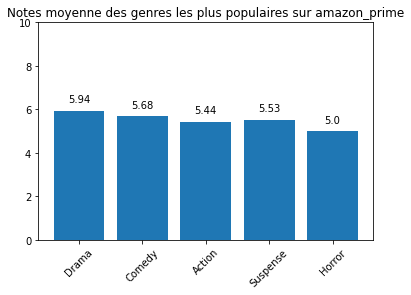

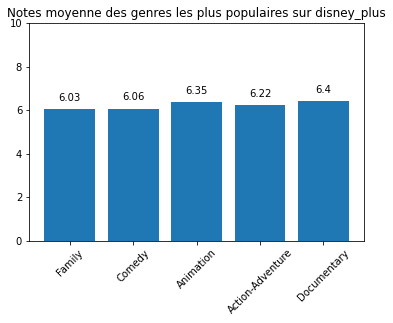

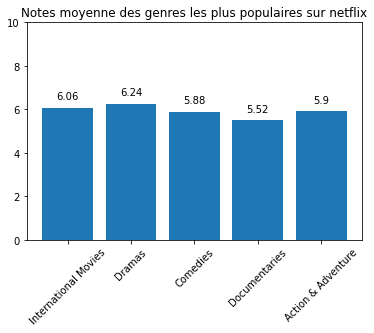

In [17]:
#on trace un graphique pour chaque fichier de files, donc pour chaque plateforme
for file in files:
    fig, ax = plt.subplots() #on précise qu'il s'agit de graphiques séparés
    bar_plot = plt.bar(genre_movie(file)[0],mean(file),tick_label=genre_movie(file)[0]) #tracé du diagramme
    plt.xticks(rotation=45) #inclinaison de l'axe des abcisses à 45°
    def autolabel(rects):
        for idx,rect in enumerate(bar_plot):
            height = rect.get_height() #on récupère la hauteur de chaque barre de mean(file)
            ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                    mean(file)[idx],
                    ha='center', va='bottom', rotation=00) #ax.text() permet de définir la position des valeurs de mean(file)
    autolabel(bar_plot)
    plt.ylim(0,10) #on fixe les limites inférieure et supérieure de l'axe des ordonnées
    plt.title('Notes moyenne des genres les plus populaires sur %s'%(file[:-11])) #titre du diagramme